In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

# **Import Data Set**

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
#split our dataset into two categories to make it easier for analysis

categorical_variables = df[["anaemia","diabetes","high_blood_pressure","sex","smoking"]]
continuous_variables = df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine",\
                             "serum_sodium","time"]]

In [ ]:
type(categorical_variables)

pandas.core.frame.DataFrame

In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

we can see that there is no missing data in our dataset

In [ ]:
continuous_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [ ]:
df.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


Karena hasil yang kita peroleh adalah DEATH_EVENT, kita mengelompokkan dataset kita berdasarkan DEATH_EVENT dan kita bisa menyimpulkan bahwa dataset kita tidak seimbang, karena total kematian (96) lebih sedikit dari setengah jumlah orang yang tidak meninggal karena gagal jantung (203).

In [ ]:
age = df[["age"]]
platelets = df[["platelets"]]

Visualisasi data yang tidak seimbang dengan scatter plot, warna akan bergantung pada DEATH_EVENT (0 atau 1).

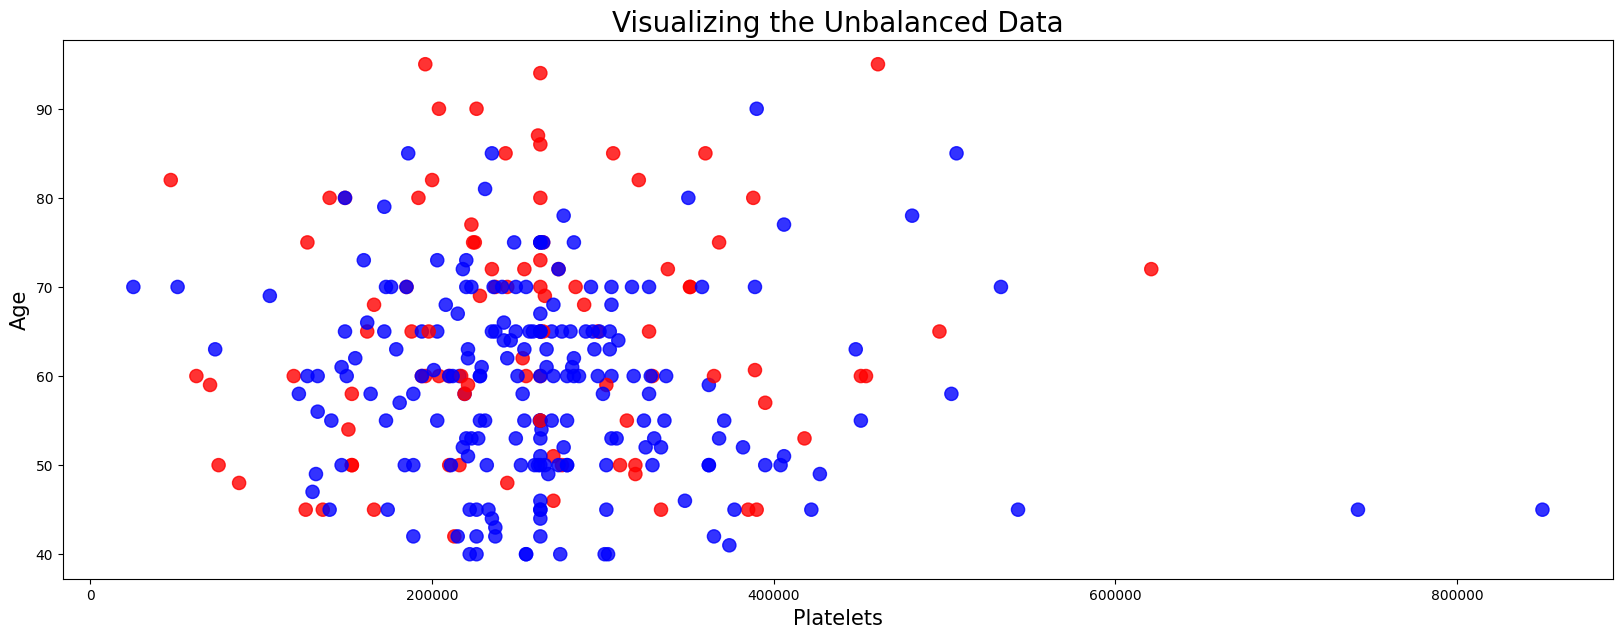

In [ ]:

# Definisikan warna untuk setiap kategori DEATH_EVENT
colors = {0: 'blue', 1: 'red'}
data_colors = df["DEATH_EVENT"].map(colors)

plt.figure(figsize=(20,7))  # Membuat kanvas gambar dengan ukuran inci
plt.scatter(platelets, age, c=data_colors, s=90, alpha=0.8)  # Membuat grafik sebaran dengan ukuran dan transparansi titik yang diatur
plt.xlabel("Platelets", fontsize=15)  # Menambahkan label 'Platelets' pada sumbu x dengan ukuran font 20
plt.ylabel("Age", fontsize=15)  # Menambahkan label 'Age' pada sumbu y dengan ukuran font 20
plt.title("Visualizing the Unbalanced Data", fontsize=20)  # Menambahkan judul grafik dengan ukuran font 22
plt.show()  # Menampilkan grafik


Kita bisa lihat biru lebih banyak dari pada merah

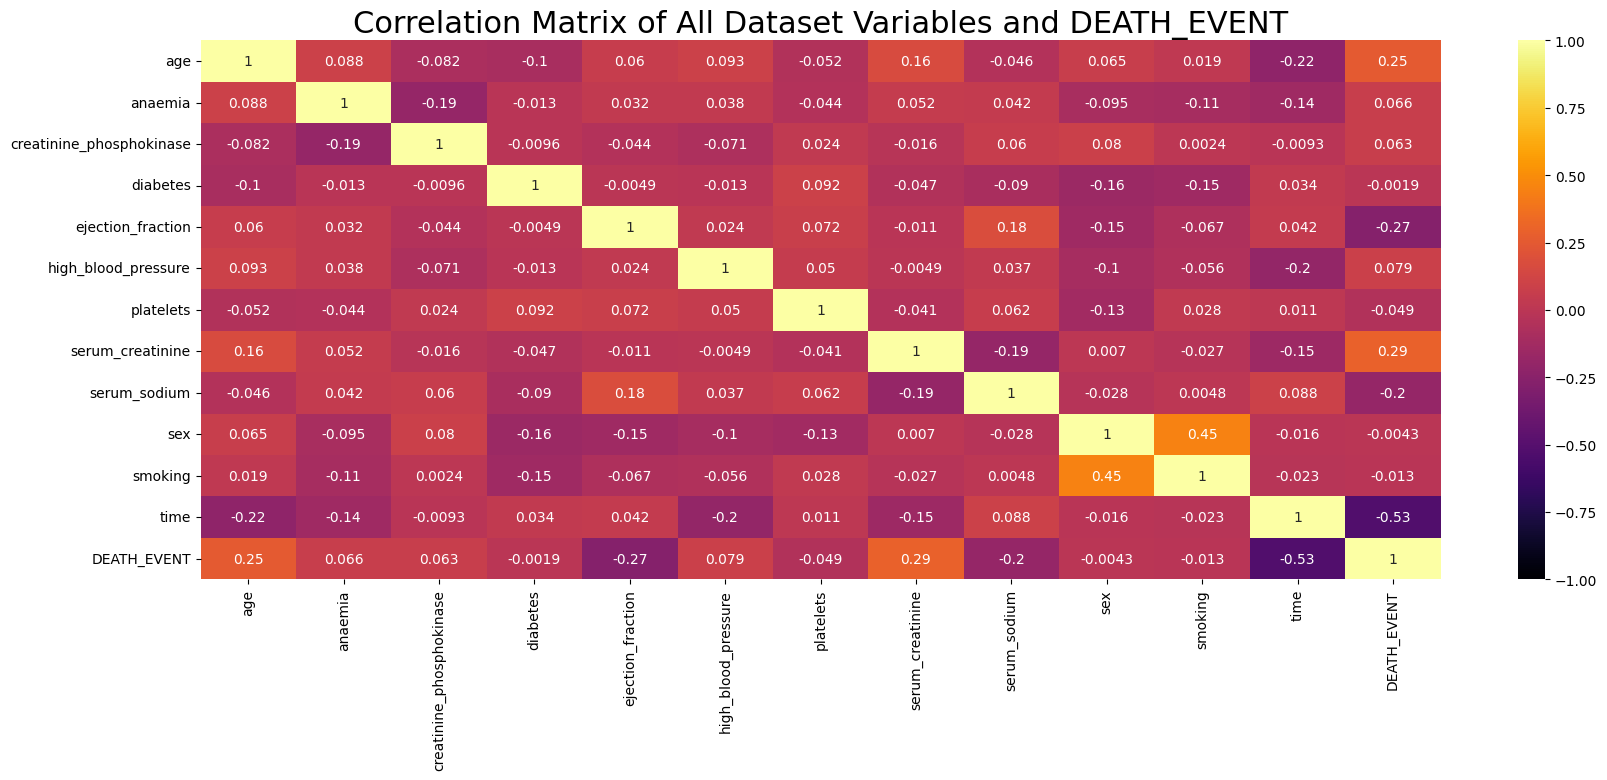

In [ ]:
plt.figure(figsize=(20,7))  # Membuat kanvas gambar dengan ukuran 13x7 inci
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="inferno", annot=True)  # Membuat heatmap dari matriks korelasi dataset
plt.title("Correlation Matrix of All Dataset Variables and DEATH_EVENT", fontsize=22)  # Menambahkan judul pada heatmap dengan ukuran font 22
plt.show()  # Menampilkan heatmap yang telah dibuat


Kami melihat bahwa ada korelasi positif antara DEATH_EVENT dengan kadar kreatinin serum dan usia. Kami juga menemukan korelasi negatif antara DEATH_EVENT dengan waktu, fraksi ejeksi, dan sedikit korelasi dengan kadar natrium serum.

# **Data Vizualation**

In [ ]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets",
                   "serum_creatinine","serum_sodium","time"]

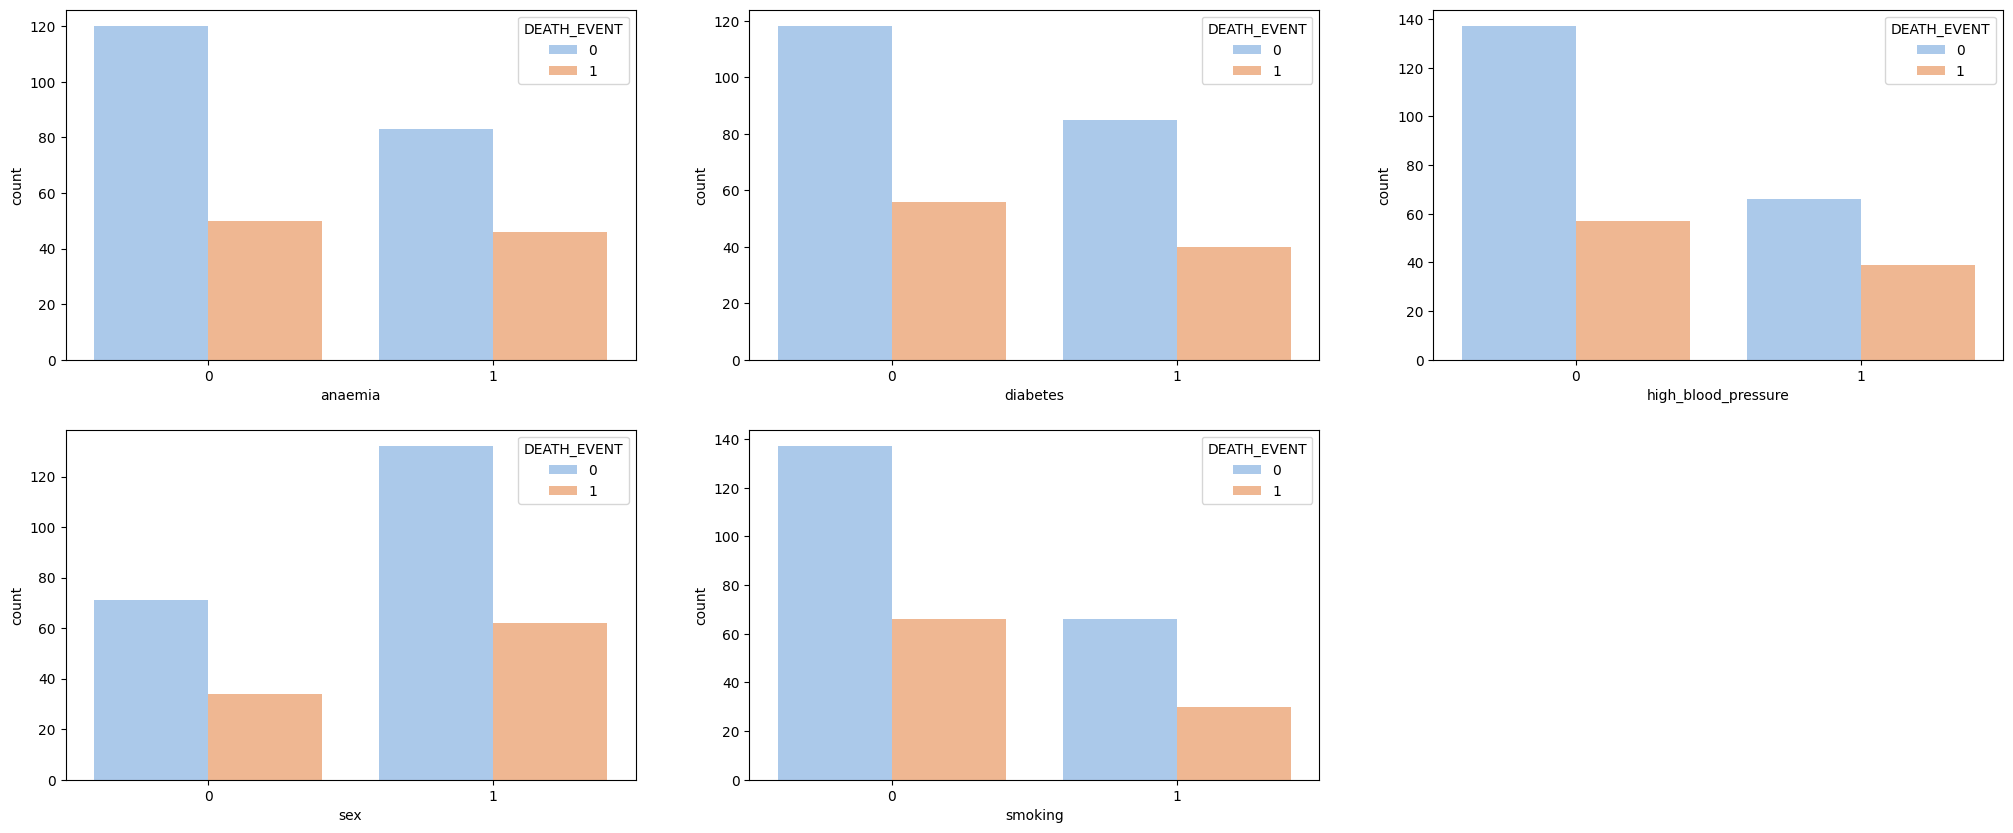

In [ ]:
# Visualizing the Influence of Categorical Variables on DEATH_EVENT

plt.figure(figsize=(25,10))  # Membuat kanvas gambar
for i, cat in enumerate(categorical_data):
    plt.subplot(2, 3, i+1)  # Membuat subplot dengan 2 baris dan 3 kolom
    sns.countplot(data=df, x=cat, hue="DEATH_EVENT", palette="pastel")  # Membuat plot jumlah pengamatan untuk setiap kategori dengan skema warna Set2
plt.show()  # Menampilkan plot


In [ ]:
for i, cat in enumerate(categorical_data):
    print(i, cat)  # Mencetak indeks (i) dan item (cat)

0 anaemia
1 diabetes
2 high_blood_pressure
3 sex
4 smoking


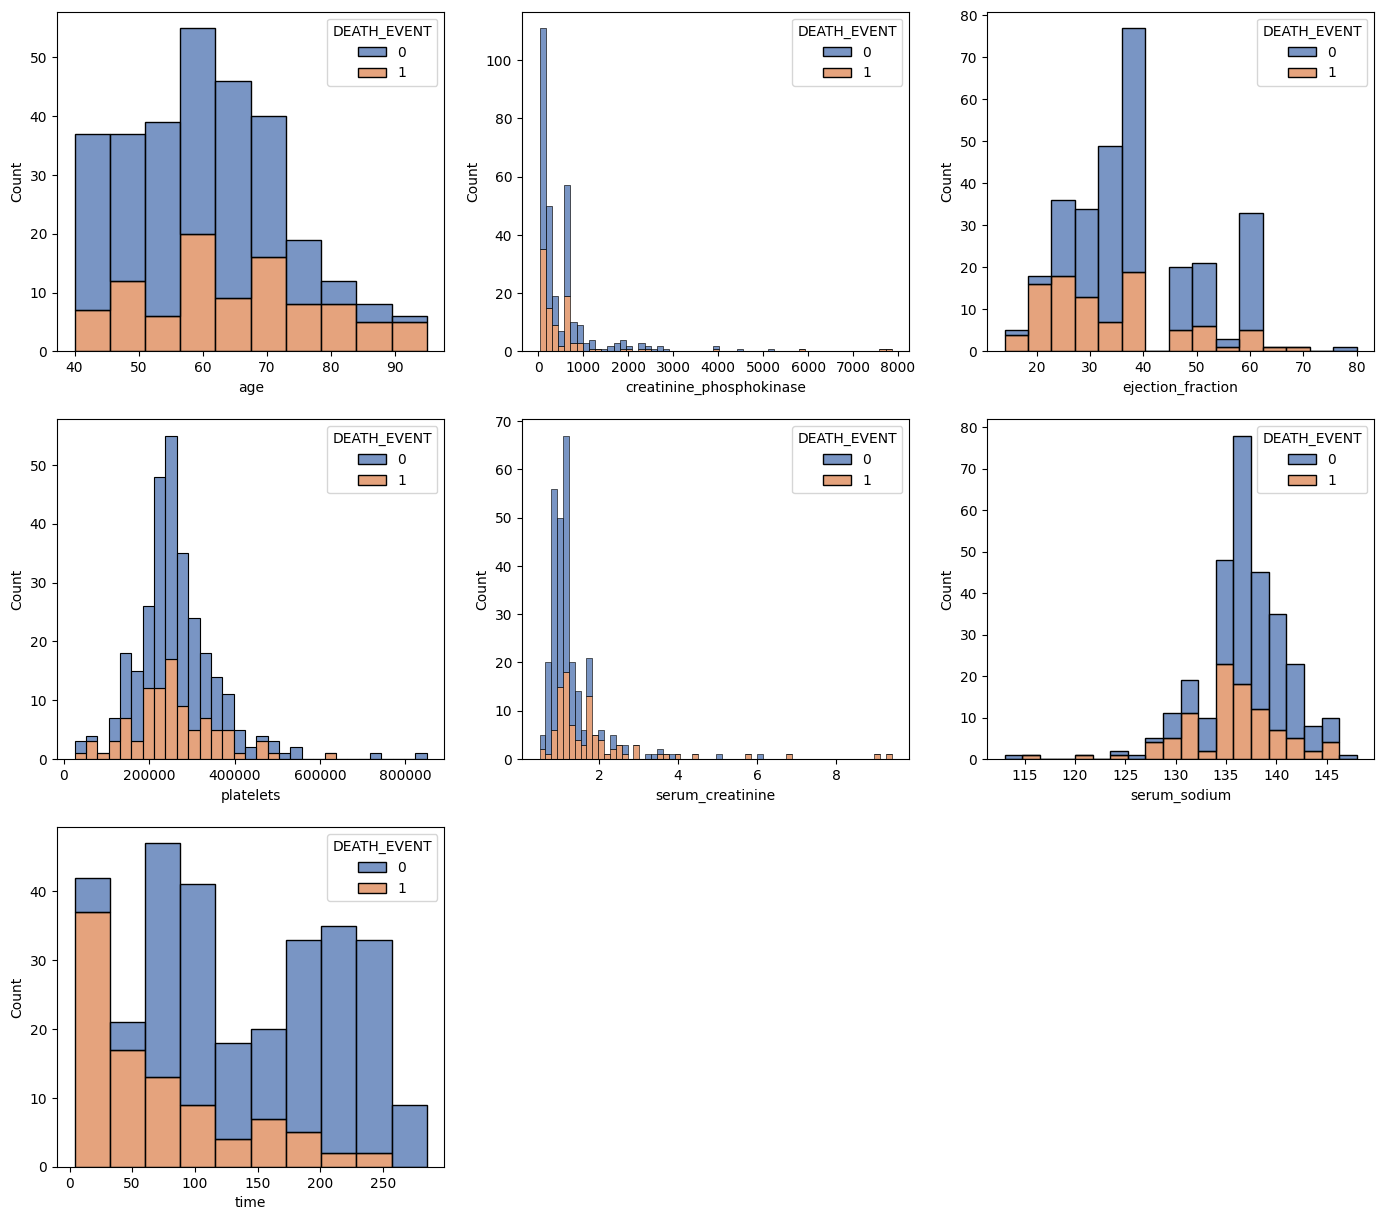

In [ ]:
# Visualizing the Impact of Continuous Variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j, con in enumerate(continuous_data):
    plt.subplot(3, 3, j+1)
    sns.histplot(data=df, x=con, hue="DEATH_EVENT", multiple="stack", palette="deep")
plt.show()

In [ ]:
for i,cat in enumerate(continuous_data):
    print(i, cat)

0 age
1 creatinine_phosphokinase
2 ejection_fraction
3 platelets
4 serum_creatinine
5 serum_sodium
6 time


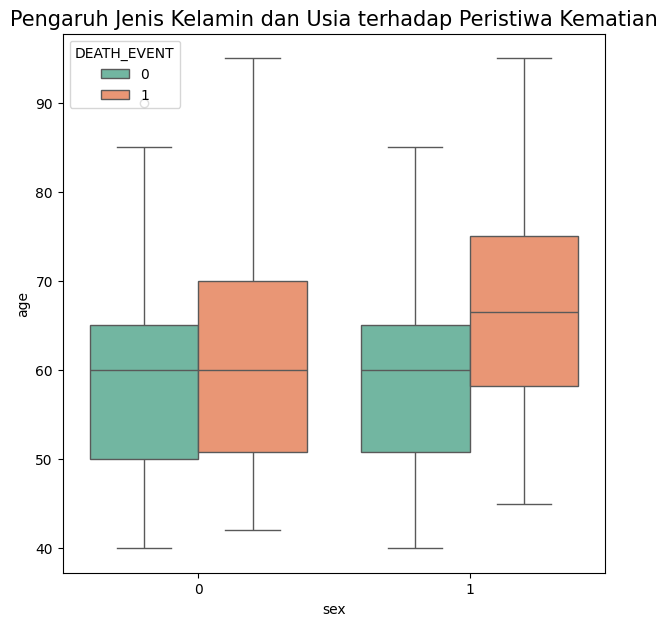

In [ ]:
# Visualizing the Impact of Sex and Age on Death Event with Different Colors

plt.figure(figsize=(7,7))  # Membuat kanvas gambar
sns.boxplot(data=df, x="sex", y="age", hue="DEATH_EVENT", palette="Set2")  # Membuat boxplot dengan palet warna "Set2"
plt.title("Pengaruh Jenis Kelamin dan Usia terhadap Peristiwa Kematian", fontsize=15)  # Menambahkan judul dengan ukuran font 22
plt.show()  # Menampilkan plot

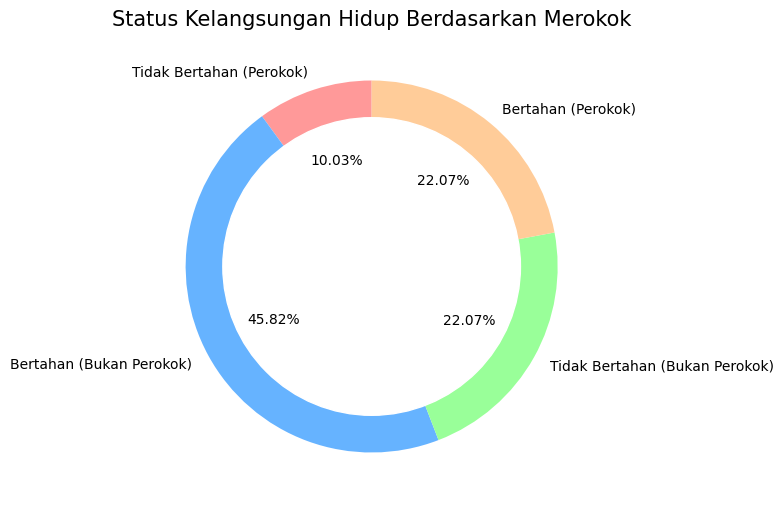

In [ ]:
# Analisis Kelangsungan Hidup Berdasarkan Status Merokok

# Memisahkan data menjadi perokok dan bukan perokok
perokok = df[df["smoking"] == 1]  # Data untuk orang yang merokok
bukan_perokok = df[df["smoking"] == 0]  # Data untuk orang yang tidak merokok

# Memisahkan data perokok dan bukan perokok berdasarkan apakah mereka bertahan atau tidak
tidak_bertahan_perokok = perokok[perokok["DEATH_EVENT"] == 1]  # Perokok yang tidak bertahan
bertahan_bukan_perokok = bukan_perokok[bukan_perokok["DEATH_EVENT"] == 0]  # Bukan perokok yang bertahan
tidak_bertahan_bukan_perokok = bukan_perokok[bukan_perokok["DEATH_EVENT"] == 1]  # Bukan perokok yang tidak bertahan
bertahan_perokok = perokok[perokok["DEATH_EVENT"] == 0]  # Perokok yang bertahan

# Menghitung jumlah setiap kategori
data_merokok = [
    len(tidak_bertahan_perokok),  # Jumlah perokok yang tidak bertahan
    len(bertahan_bukan_perokok),  # Jumlah bukan perokok yang bertahan
    len(tidak_bertahan_bukan_perokok),  # Jumlah bukan perokok yang tidak bertahan
    len(bertahan_perokok)  # Jumlah perokok yang bertahan
]

# Memberi label pada setiap kategori
label_merokok = [
    "Tidak Bertahan (Perokok)",  # Label untuk perokok yang tidak bertahan
    "Bertahan (Bukan Perokok)",  # Label untuk bukan perokok yang bertahan
    "Tidak Bertahan (Bukan Perokok)",  # Label untuk bukan perokok yang tidak bertahan
    "Bertahan (Perokok)"  # Label untuk perokok yang bertahan
]

# Membuat plot pie chart dengan warna yang menarik
plt.figure(figsize=(6,9))  # Membuat kanvas gambar dengan ukuran 9x9 inci
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]  # Mengatur warna untuk setiap kategori
plt.pie(data_merokok, labels=label_merokok, autopct='%.2f%%', startangle=90, colors=colors)  # Membuat pie chart
circle = plt.Circle((0,0), 0.8, color="white")  # Membuat lingkaran putih di tengah pie chart
p = plt.gcf()  # Mendapatkan current figure
p.gca().add_artist(circle)  # Menambahkan lingkaran putih ke plot
plt.title("Status Kelangsungan Hidup Berdasarkan Merokok", fontsize=15)  # Menambahkan judul dengan ukuran font 22
plt.show()  # Menampilkan plot


In [ ]:
(type(bukan_perokok))

pandas.core.frame.DataFrame

In [ ]:
bukan_perokok[bukan_perokok["DEATH_EVENT"]==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
6,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207,1
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1


In [ ]:
# Menghitung persentase perokok yang tidak bertahan terhadap total populasi
total_populasi = len(df)  # Total populasi dalam dataset
persentase_tidak_bertahan_perokok = (len(tidak_bertahan_perokok) / total_populasi) * 100

print(f"Persentase perokok yang tidak bertahan: {persentase_tidak_bertahan_perokok:.2f}%")


Persentase perokok yang tidak bertahan: 10.03%


In [ ]:
len(bukan_perokok[bukan_perokok["DEATH_EVENT"]==1])

66

In [ ]:
data_merokok

[30, 137, 66, 66]

In [ ]:
label_merokok

['Tidak Bertahan (Perokok)',
 'Bertahan (Bukan Perokok)',
 'Tidak Bertahan (Bukan Perokok)',
 'Bertahan (Perokok)']

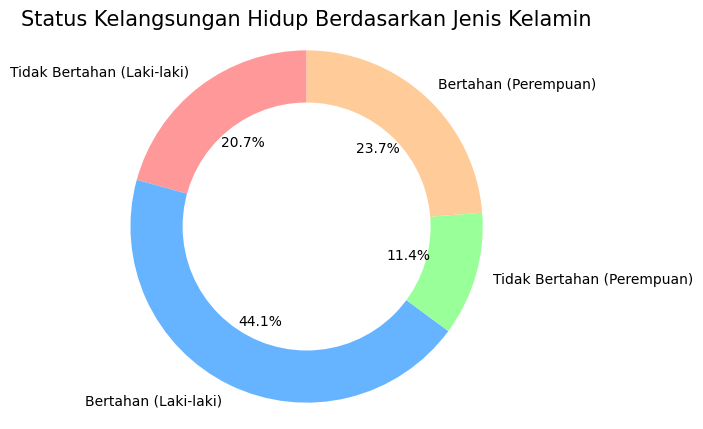

In [88]:
# Memisahkan data berdasarkan jenis kelamin menjadi laki-laki dan perempuan
laki_laki = df[df["sex"]==1]
perempuan = df[df["sex"]==0]

# Memisahkan data laki-laki dan perempuan berdasarkan apakah mereka bertahan atau tidak
tidak_bertahan_laki_laki = laki_laki[laki_laki["DEATH_EVENT"]==1]
bertahan_laki_laki = laki_laki[laki_laki["DEATH_EVENT"]==0]
tidak_bertahan_perempuan = perempuan[perempuan["DEATH_EVENT"]==1]
bertahan_perempuan = perempuan[perempuan["DEATH_EVENT"]==0]

# Menyiapkan data untuk diagram donat
data_jenis_kelamin = [len(tidak_bertahan_laki_laki), len(bertahan_laki_laki), len(tidak_bertahan_perempuan), len(bertahan_perempuan)]
label_jenis_kelamin = ["Tidak Bertahan (Laki-laki)","Bertahan (Laki-laki)","Tidak Bertahan (Perempuan)","Bertahan (Perempuan)"]

# Membuat diagram donat
plt.figure(figsize=(5,5))
plt.pie(data_jenis_kelamin, labels=label_jenis_kelamin, autopct='%.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])

# Menambahkan lingkaran putih di tengah diagram
lingkaran = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(lingkaran)

# Menambahkan judul diagram
plt.title("Status Kelangsungan Hidup Berdasarkan Jenis Kelamin", fontsize=15)

# Menampilkan diagram donat
plt.axis('equal')  # Mengatur agar diagram donat menjadi lingkaran sempurna
plt.show()


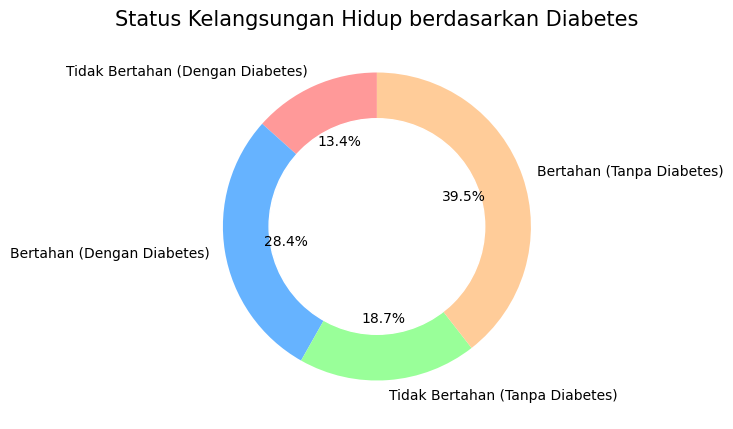

In [89]:
# Memisahkan data menjadi dua kelompok berdasarkan keberadaan diabetes
dengan_diabetes = df[df["diabetes"]==1]
tanpa_diabetes = df[df["diabetes"]==0]

# Memisahkan data dengan diabetes dan tanpa diabetes berdasarkan status kelangsungan hidup
tidak_bertahan_dengan_diabetes = dengan_diabetes[dengan_diabetes["DEATH_EVENT"]==1]
bertahan_dengan_diabetes = dengan_diabetes[dengan_diabetes["DEATH_EVENT"]==0]
tidak_bertahan_tanpa_diabetes = tanpa_diabetes[tanpa_diabetes["DEATH_EVENT"]==1]
bertahan_tanpa_diabetes = tanpa_diabetes[tanpa_diabetes["DEATH_EVENT"]==0]

# Menyiapkan data untuk diagram lingkaran
data_diabetes = [len(tidak_bertahan_dengan_diabetes), len(bertahan_dengan_diabetes), len(tidak_bertahan_tanpa_diabetes), \
                 len(bertahan_tanpa_diabetes)]
label_diabetes = ["Tidak Bertahan (Dengan Diabetes)","Bertahan (Dengan Diabetes)","Tidak Bertahan (Tanpa Diabetes)",\
                   "Bertahan (Tanpa Diabetes)"]

# Membuat diagram lingkaran
plt.figure(figsize=(5,5))
plt.pie(data_diabetes, labels = label_diabetes, autopct='%.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
lingkaran = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(lingkaran)
plt.title("Status Kelangsungan Hidup berdasarkan Diabetes", fontsize=15)
plt.show()


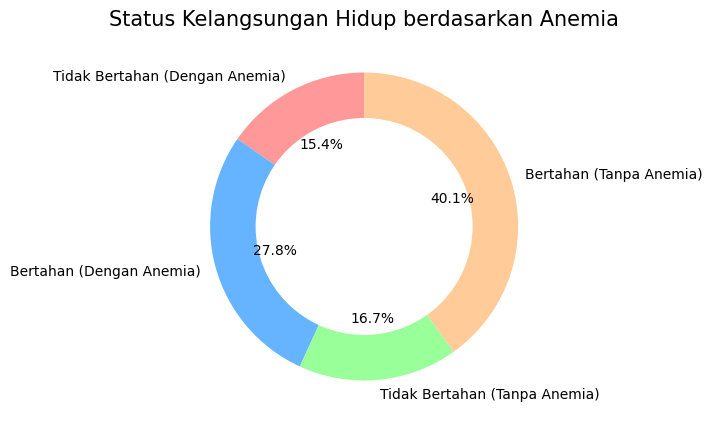

In [90]:
# Memisahkan data menjadi dua kelompok berdasarkan keberadaan anemia
dengan_anemia = df[df["anaemia"]==1]
tanpa_anemia = df[df["anaemia"]==0]

# Memisahkan data dengan anemia dan tanpa anemia berdasarkan status kelangsungan hidup
tidak_bertahan_dengan_anemia = dengan_anemia[dengan_anemia["DEATH_EVENT"]==1]
bertahan_dengan_anemia = dengan_anemia[dengan_anemia["DEATH_EVENT"]==0]
tidak_bertahan_tanpa_anemia = tanpa_anemia[tanpa_anemia["DEATH_EVENT"]==1]
bertahan_tanpa_anemia = tanpa_anemia[tanpa_anemia["DEATH_EVENT"]==0]

# Menyiapkan data untuk diagram lingkaran
data_anemia = [len(tidak_bertahan_dengan_anemia), len(bertahan_dengan_anemia), len(tidak_bertahan_tanpa_anemia), \
                len(bertahan_tanpa_anemia)]
label_anemia = ["Tidak Bertahan (Dengan Anemia)","Bertahan (Dengan Anemia)","Tidak Bertahan (Tanpa Anemia)",\
                  "Bertahan (Tanpa Anemia)"]

# Membuat diagram lingkaran
plt.figure(figsize=(5,5))
plt.pie(data_anemia, labels = label_anemia, autopct='%.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
lingkaran = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(lingkaran)
plt.title("Status Kelangsungan Hidup berdasarkan Anemia", fontsize=15)
plt.show()


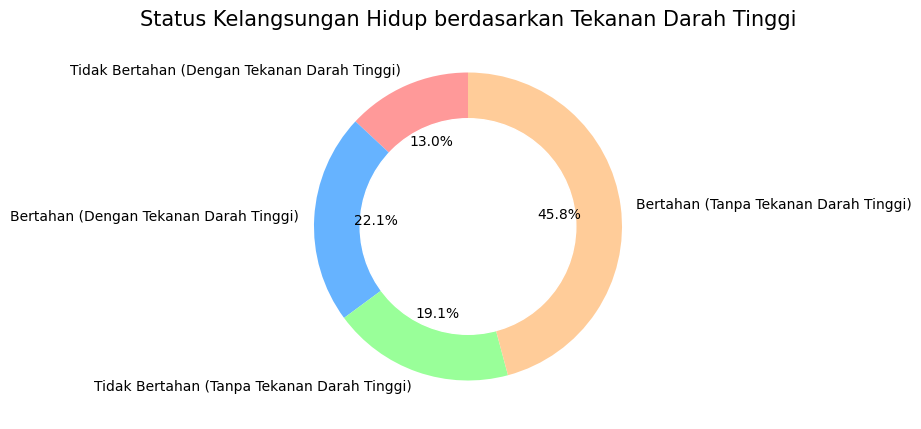

In [91]:
# Memisahkan data menjadi dua kelompok berdasarkan keberadaan tekanan darah tinggi
dengan_tekanan_darah_tinggi = df[df["high_blood_pressure"]==1]
tanpa_tekanan_darah_tinggi = df[df["high_blood_pressure"]==0]

# Memisahkan data dengan tekanan darah tinggi dan tanpa tekanan darah tinggi berdasarkan status kelangsungan hidup
tidak_bertahan_dengan_tekanan_darah_tinggi = dengan_tekanan_darah_tinggi[dengan_tekanan_darah_tinggi["DEATH_EVENT"]==1]
bertahan_dengan_tekanan_darah_tinggi = dengan_tekanan_darah_tinggi[dengan_tekanan_darah_tinggi["DEATH_EVENT"]==0]
tidak_bertahan_tanpa_tekanan_darah_tinggi = tanpa_tekanan_darah_tinggi[tanpa_tekanan_darah_tinggi["DEATH_EVENT"]==1]
bertahan_tanpa_tekanan_darah_tinggi = tanpa_tekanan_darah_tinggi[tanpa_tekanan_darah_tinggi["DEATH_EVENT"]==0]

# Menyiapkan data untuk diagram lingkaran
data_tekanan_darah_tinggi = [len(tidak_bertahan_dengan_tekanan_darah_tinggi), len(bertahan_dengan_tekanan_darah_tinggi), \
                            len(tidak_bertahan_tanpa_tekanan_darah_tinggi), len(bertahan_tanpa_tekanan_darah_tinggi)]

label_tekanan_darah_tinggi = ["Tidak Bertahan (Dengan Tekanan Darah Tinggi)","Bertahan (Dengan Tekanan Darah Tinggi)",\
                   "Tidak Bertahan (Tanpa Tekanan Darah Tinggi)","Bertahan (Tanpa Tekanan Darah Tinggi)"]

# Membuat diagram lingkaran
plt.figure(figsize=(5,5))
plt.pie(data_tekanan_darah_tinggi, labels = label_tekanan_darah_tinggi, autopct='%.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
lingkaran = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(lingkaran)
plt.title("Status Kelangsungan Hidup berdasarkan Tekanan Darah Tinggi", fontsize=15)
plt.show()


# **Data modeling & prediction using continuous data:**

In [77]:
# Memilih fitur-fitur yang akan digunakan sebagai variabel independen (X)
x = df[["age", "creatinine_phosphokinase", "ejection_fraction", "serum_creatinine", "serum_sodium", "time"]]

# Memilih target variabel yang akan diprediksi (Y)
y = df["DEATH_EVENT"]


In [78]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [79]:
 # Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [80]:
 accuracy_list = [] # A list to save all the values from different models accuracy for comparaison using a bar chart

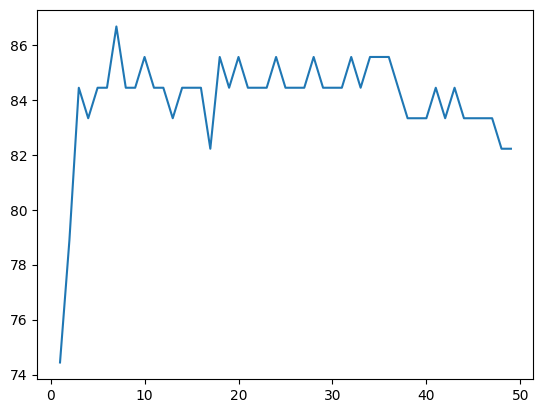

In [81]:
# Kami menggunakan program ini untuk menemukan nilai k optimal

# Membuat daftar untuk menyimpan akurasi model KNN untuk berbagai nilai k
knn_list = []

# Melakukan iterasi untuk nilai k dari 1 hingga 49
for k in range(1, 50):
    # Membuat model KNN dengan k tetangga
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Melatih model dengan data pelatihan yang sudah diskalakan
    knn_model.fit(x_train_scaled, y_train)

    # Membuat prediksi menggunakan model KNN pada data pengujian yang sudah diskalakan
    knn_prediction = knn_model.predict(x_test_scaled)

    # Menghitung akurasi prediksi model dan mengonversinya ke persen
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)

    # Menambahkan nilai akurasi ke dalam daftar
    knn_list.append(knn_accuracy)

# Membuat array untuk nilai k dari 1 hingga 49
k = np.arange(1, 50)

# Membuat plot dari nilai k terhadap akurasi model KNN
plt.plot(k, knn_list)


In [82]:
# Membuat model KNN dengan k=6
knn_model = KNeighborsClassifier(n_neighbors=6)

# Melatih model dengan data pelatihan yang sudah diskalakan
knn_model.fit(x_train_scaled, y_train)

# Membuat prediksi menggunakan model KNN pada data pengujian yang sudah diskalakan
knn_prediction = knn_model.predict(x_test_scaled)

# Menghitung akurasi prediksi model dan mengonversinya ke persen
knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)

# Menambahkan nilai akurasi ke dalam daftar akurasi
accuracy_list.append(knn_accuracy)


Naive Bayes

In [83]:
# Membuat model Naive Bayes Gaussian
nb_model = GaussianNB()

# Melatih model dengan data pelatihan yang sudah diskalakan
nb_model.fit(x_train_scaled, y_train)

# Membuat prediksi menggunakan model Naive Bayes pada data pengujian yang sudah diskalakan
nb_prediction = nb_model.predict(x_test_scaled)

# Menghitung akurasi prediksi model dan mengonversinya ke persen
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100)

# Menambahkan nilai akurasi ke dalam daftar akurasi
accuracy_list.append(nb_accuracy)


Decison Tree Classifier

In [84]:
# Membuat model Decision Tree dengan kriteria 'entropy' dan kedalaman maksimum 2
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Melatih model Decision Tree dengan data pelatihan yang sudah diskalakan
dt_model.fit(x_train_scaled, y_train)

# Membuat prediksi menggunakan model Decision Tree pada data pengujian yang sudah diskalakan
dt_prediction = dt_model.predict(x_test_scaled)

# Menghitung akurasi prediksi model dan mengonversinya ke persen
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100)

# Menambahkan nilai akurasi ke dalam daftar akurasi
accuracy_list.append(dt_accuracy)


In [85]:
accuracy_list

[84.44, 82.22, 88.89]

In [86]:
models = ["KNearestNeighbors","Decision Tree","Naive Bayes"]



<ipython-input-87-284c4a999c74>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracy_list, palette="viridis")


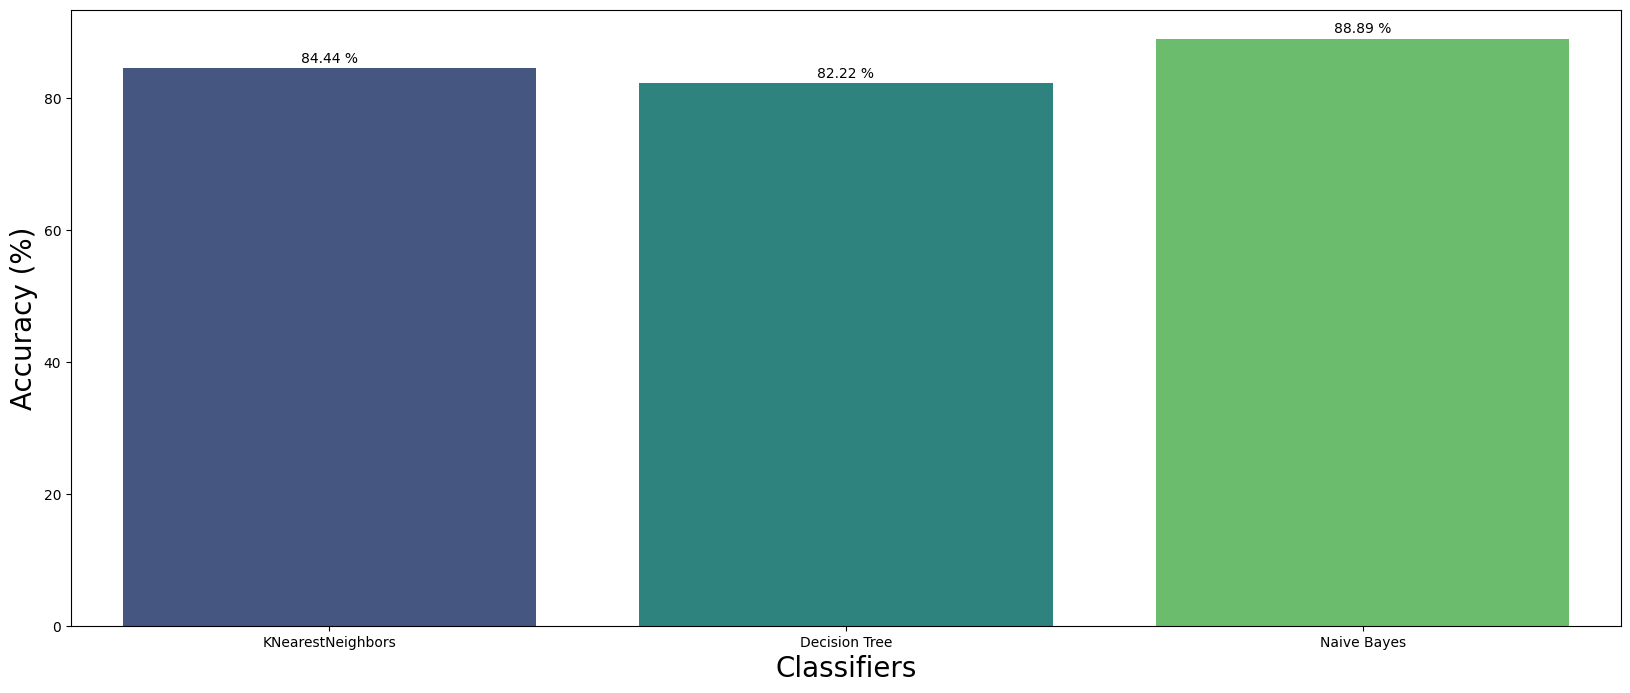

In [87]:

# Memastikan panjang daftar models dan accuracy_list sama sebelum membuat plot
if len(models) == len(accuracy_list):
    plt.figure(figsize=(20,8))  # Membuat figure baru

    # Membuat barplot dengan sumbu x adalah models dan sumbu y adalah accuracy_list
    # Menggunakan palet warna "viridis" untuk memberikan warna berbeda pada setiap batang
    ax = sns.barplot(x=models, y=accuracy_list, palette="viridis")

    plt.xlabel("Classifiers", fontsize=20)  # Menambahkan label pada sumbu x dengan teks "Classifiers"
    plt.ylabel("Accuracy (%)", fontsize=20)  # Menambahkan label pada sumbu y dengan teks "Accuracy (%)"

    # Menambahkan anotasi pada setiap bar di barplot
    for p in ax.patches:
        width = p.get_width()  # Mendapatkan lebar dari setiap bar
        height = p.get_height()  # Mendapatkan tinggi dari setiap bar
        x = p.get_x()  # Mendapatkan posisi x dari setiap bar
        y = p.get_y()  # Mendapatkan posisi y dari setiap bar

        # Menambahkan teks di atas setiap bar dengan nilai akurasi
        ax.annotate(f"{height} %", (x + width/2, y + height * 1.01), ha="center")

    plt.show()  # Menampilkan barplot

 Akurasi KNN sebesar 84,4% menunjukkan seberapa baik model KNN memprediksi kelas yang benar dari total sampel yang diuji. Decision Tree mencapai akurasi sebesar 88,99%, menunjukkan keberhasilan model dalam membuat prediksi berdasarkan serangkaian keputusan dari fitur-fitur yang tersedia. Sementara itu, Naive Bayes mencapai akurasi sebesar 82,22%, menandakan kemampuan model ini dalam memprediksi kelas yang benar dengan mengasumsikan independensi antara fitur-fitur.